In [101]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

df=pd.read_csv(r"C:\Users\HP\Desktop\New folder\uber.csv")

In [103]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [104]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [105]:
df = df.drop(['Unnamed: 0','key'],axis=1)
df.dropna(axis=0,inplace=True)

In [106]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [107]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [108]:
import datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [109]:
df['Year'] = df['pickup_datetime'].apply(lambda time: time.year)
df['Month'] = df['pickup_datetime'].apply(lambda time: time.month)
df['Day'] = df['pickup_datetime'].apply(lambda time: time.day)
df['Day_of_Week'] = df['pickup_datetime'].apply(lambda time: time.dayofweek)
df['Day_of_Week_num'] = df['pickup_datetime'].apply(lambda time: time.dayofweek)
df['Hour'] = df['pickup_datetime'].apply(lambda time: time.hour)

In [110]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Day_of_Week,Day_of_Week_num,Hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,3,17


In [111]:
df['Day_of_Week']=np.where(df['Day_of_Week']==0,"Mon",np.where(df['Day_of_Week']==1,"Tue",np.where(df['Day_of_Week']==2,"Wed",np.where(df['Day_of_Week']==3,"Thur",np.where(df['Day_of_Week']==4,"Fri",np.where(df['Day_of_Week']==5,"Sat","Sun"))))))

In [112]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [113]:
df['Distance']= haversine(df['pickup_longitude'],df['dropoff_longitude'],
                             df['pickup_latitude'],df['dropoff_latitude'])

df['Distance'] = df['Distance'].astype(float)  

Text(0.5, 1.0, 'Numwer of trips vs years')

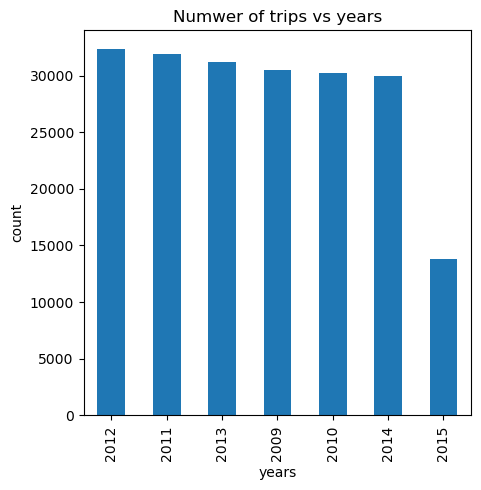

In [114]:
years=df['Year'].value_counts()
years.plot(kind='bar',figsize=(5,5))
plt.xlabel('years')
plt.ylabel('count')
plt.title('Numwer of trips vs years')

Text(0.5, 1.0, 'Numwer of trips vs hours')

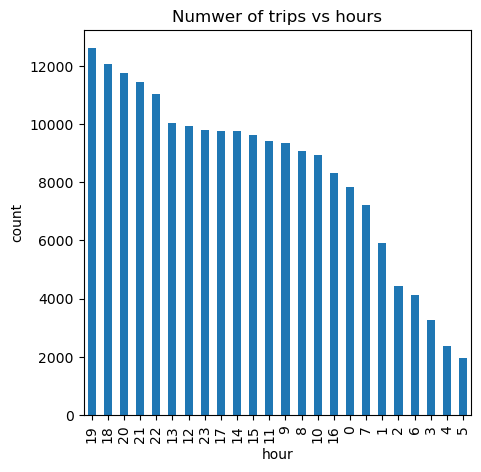

In [67]:
hour=df['Hour'].value_counts()
hour.plot(kind='bar',figsize=(5,5))
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Numwer of trips vs hours')

Text(0.5, 1.0, 'Numwer of trips vs months')

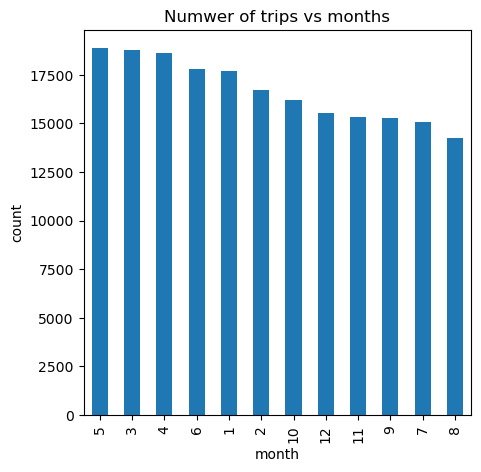

In [68]:
month=df['Month'].value_counts()
month.plot(kind='bar',figsize=(5,5))
plt.xlabel('month')
plt.ylabel('count')
plt.title('Numwer of trips vs months')

Text(0.5, 1.0, 'Numwer of trips vs weekdays')

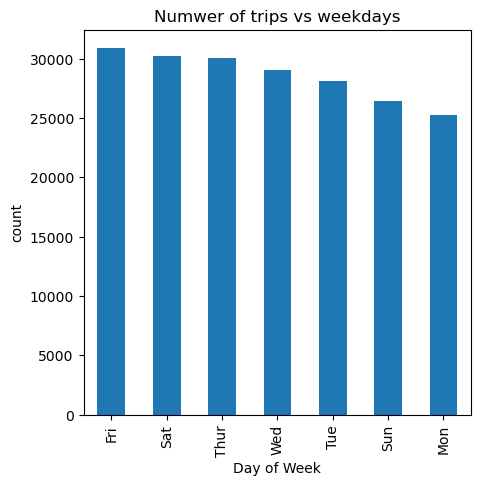

In [69]:
DayWeek=df['Day_of_Week'].value_counts()
DayWeek.plot(kind='bar',figsize=(5,5))
plt.xlabel('Day of Week')
plt.ylabel('count')
plt.title('Numwer of trips vs weekdays')

Text(0.5, 1.0, 'fare vs distance')

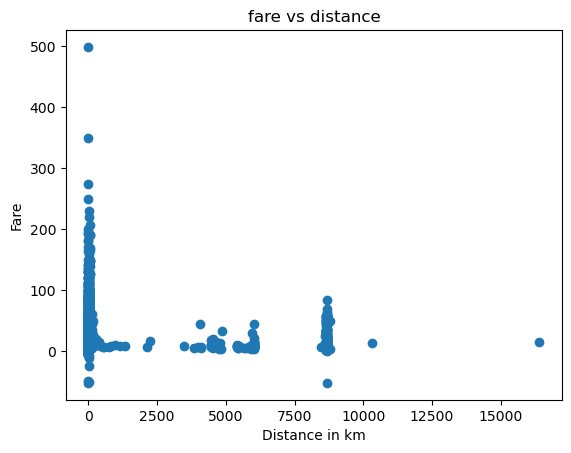

In [70]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance in km')
plt.ylabel('Fare')
plt.title('fare vs distance')

<AxesSubplot:xlabel='Distance', ylabel='fare_amount'>

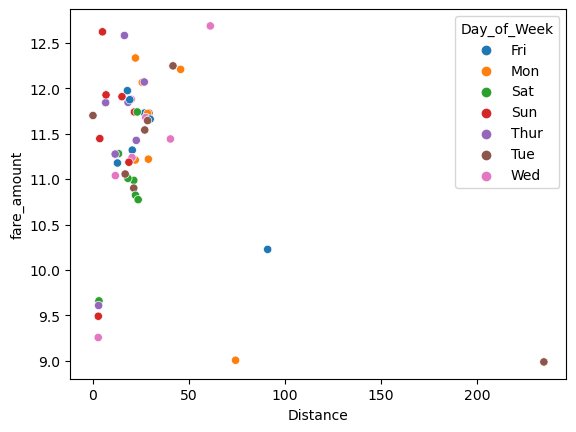

In [115]:
table = pd.pivot_table(data=df,index=['passenger_count','Day_of_Week'],values=['Distance','fare_amount'])
table
sns.scatterplot(data=table, x="Distance", y="fare_amount", hue="Day_of_Week")

In [116]:
corr = df.corr()

corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Day_of_Week_num,Hour,Distance
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158,0.118331,0.023813,0.001384,0.007508,-0.021463,0.024684
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415,0.009966,-0.004665,0.005183,0.000825,0.002432,0.105581
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559,-0.010234,0.004625,-0.008263,-0.002454,-0.003821,-0.062436
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033,0.008467,-0.003605,0.005055,0.000001,0.003478,0.056717
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.011239,0.003818,-0.007835,-0.002335,-0.002544,-0.079944
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000,0.004802,0.009774,0.003242,0.033189,0.013187,-0.001472
Year,0.118331,0.009966,-0.010234,0.008467,-0.011239,0.004802,1.000000,-0.115860,-0.012165,0.006116,0.002162,0.026377
Month,0.023813,-0.004665,0.004625,-0.003605,0.003818,0.009774,-0.115860,1.000000,-0.017358,-0.008785,-0.003924,-0.000633
Day,0.001384,0.005183,-0.008263,0.005055,-0.007835,0.003242,-0.012165,-0.017358,1.000000,0.005609,0.004664,-0.002114
Day_of_Week_num,0.007508,0.000825,-0.002454,0.000001,-0.002335,0.033189,0.006116,-0.008785,0.005609,1.000000,-0.086956,-0.004540


array([[<AxesSubplot:title={'center':'fare_amount'}>,
        <AxesSubplot:title={'center':'pickup_datetime'}>,
        <AxesSubplot:title={'center':'pickup_longitude'}>,
        <AxesSubplot:title={'center':'pickup_latitude'}>],
       [<AxesSubplot:title={'center':'dropoff_longitude'}>,
        <AxesSubplot:title={'center':'dropoff_latitude'}>,
        <AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Day_of_Week_num'}>,
        <AxesSubplot:title={'center':'Hour'}>],
       [<AxesSubplot:title={'center':'Distance'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

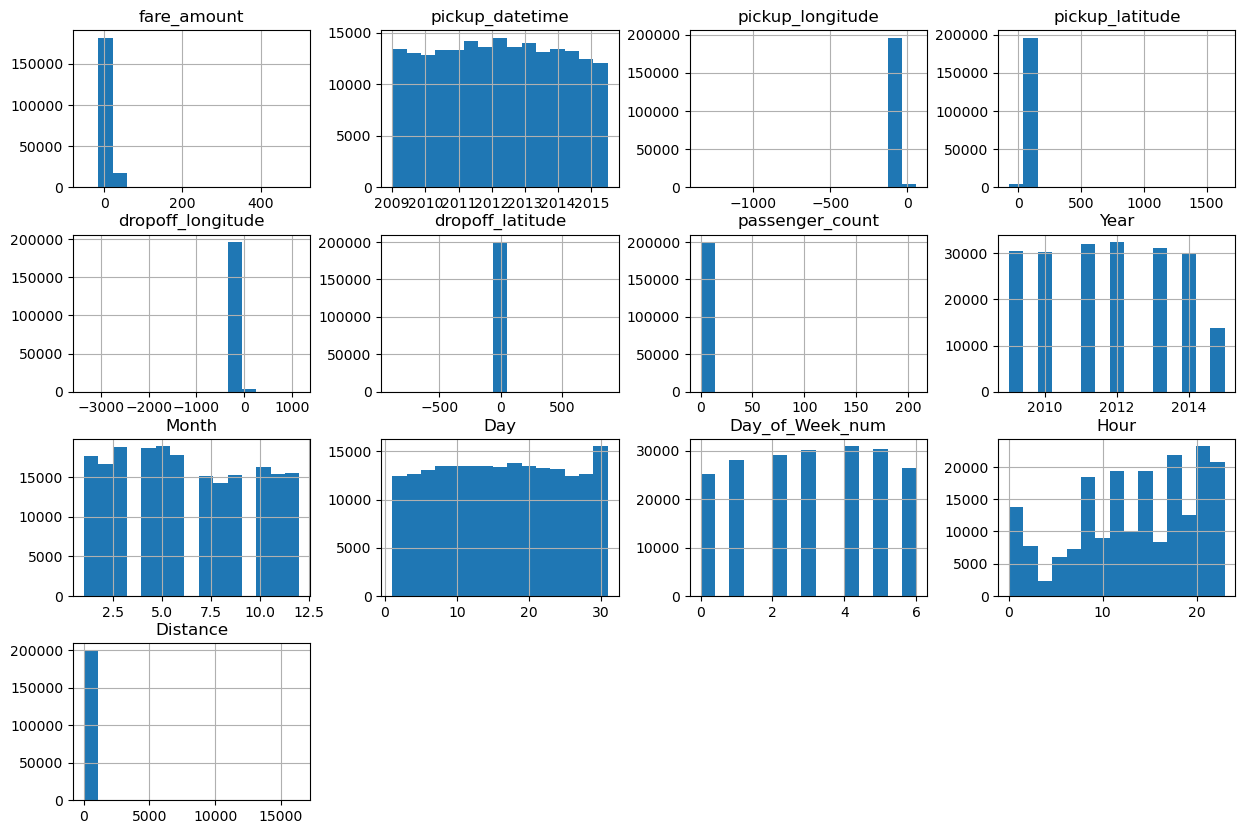

In [73]:
df.hist(bins=15, figsize=(15, 10))

In [117]:
df.drop(['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Day_of_Week'],axis=1,inplace=True)

In [118]:
df.dtypes

fare_amount        float64
passenger_count      int64
Year                 int64
Month                int64
Day                  int64
Day_of_Week_num      int64
Hour                 int64
Distance           float64
dtype: object

In [119]:
df.drop(df[df['Distance'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] < 2.5].index, inplace = True)
df.drop(df[df['Distance']>130].index,inplace=True)

In [120]:
y = df['fare_amount'].values.reshape(-1, 1) 
x=df.drop(['fare_amount'],axis=1)

In [123]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [124]:
print(vif)

   VIF Factor         features
0    2.476440  passenger_count
1   17.033535             Year
2    4.334285            Month
3    4.268968              Day
4    3.484726  Day_of_Week_num
5    5.330366             Hour
6    1.723438         Distance


In [127]:
x1=x.drop(['Year'],axis=1)

In [128]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x1.columns

In [129]:
print(vif)

   VIF Factor         features
0    2.302009  passenger_count
1    3.452836            Month
2    3.443268              Day
3    2.889188  Day_of_Week_num
4    3.794681             Hour
5    1.648064         Distance


In [131]:
std = StandardScaler()
y_std = std.fit_transform(y)
x_std = std.fit_transform(x1)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.3, random_state = 42)

In [134]:
#LOGISTIC REGRESSION
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [135]:
y_pred = model_lr.predict(X_test)

In [136]:
print("Training set score: {:.2f}".format(model_lr.score(X_train, y_train)))
print("Test set score: {:.7f}".format(model_lr.score(X_test, y_test)))

Training set score: 0.60
Test set score: 0.6910427


In [137]:
MAE_lr= metrics.mean_absolute_error(y_test, y_pred)
MSE_lr= metrics.mean_squared_error(y_test, y_pred)
RMSE_lr= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_lr=r2_score(y_test, y_pred)
Adj_r2_lr=1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))

In [138]:
print('Mean absolute error of linear regression',MAE_lr)
print('Mean square  error of linear regression',MSE_lr)
print('root Mean square error of linear regression',RMSE_lr)
print('r2 score of linear regression',r2_lr)
print('adjusted r2 of linear regression',Adj_r2_lr)

Mean absolute error of linear regression 0.2740106595872346
Mean square  error of linear regression 0.3030002500930504
root Mean square error of linear regression 0.5504545849505211
r2 score of linear regression 0.6910426889628902
adjusted r2 of linear regression 0.691010817979701


In [139]:

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [140]:
y_pred_rf = rf_reg.predict(X_test)

In [141]:
MAE_rf= metrics.mean_absolute_error(y_test, y_pred_rf)
MSE_rf= metrics.mean_squared_error(y_test, y_pred_rf)
RMSE_rf= np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf=r2_score(y_test, y_pred_rf)
Adj_r2_rf=1-(1-r2_score(y_test, y_pred_rf))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))

In [142]:
print('Mean absolute error of random forest regression',MAE_rf)
print('Mean square  error of random forest regression',MSE_rf)
print('root Mean square error of random forest regression',RMSE_rf)
print('r2 score of random forest regression',r2_rf)
print('adjusted r2 of random forest regression',Adj_r2_rf)

Mean absolute error of random forest regression 0.2444698266378203
Mean square  error of random forest regression 0.22033817447798673
root Mean square error of random forest regression 0.46940193275910863
r2 score of random forest regression 0.7753299217256795
adjusted r2 of random forest regression 0.7753067455261463


In [143]:
reg = GradientBoostingRegressor()
clf=reg.fit(X_train, y_train)
y_pred_gbr= reg.predict(X_test)

In [144]:
MSE_gbr=metrics.mean_squared_error(y_test, reg.predict(X_test))
r2_gbr=r2_score(y_test, y_pred_gbr)
RMSE_gbr=np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr))
MAE_gbr=metrics.mean_absolute_error(y_test, y_pred_gbr)
Adj_r2_gbr=1-(1-r2_score(y_test, y_pred_gbr))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))

In [145]:
print('Mean absolute error of gradient boost  regression',MAE_gbr)
print('Mean square  error of gradient boost regression',MSE_gbr)
print('root Mean square error of gradient boost regression',RMSE_gbr)
print('r2 score of gradient boost regression',r2_gbr)
print('adjusted r2 of gradient boost regression',Adj_r2_gbr)

Mean absolute error of gradient boost  regression 0.22986205114457883
Mean square  error of gradient boost regression 0.20241681150228366
root Mean square error of gradient boost regression 0.4499075588410175
r2 score of gradient boost regression 0.7936036231942192
adjusted r2 of gradient boost regression 0.7935823320474473


In [146]:
cols = ['Model', 'RMSE', 'R2_score','MAE','ADJ_r']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

In [147]:
full_metrics = pd.Series({'Model': "Linear Regression", 'RMSE' : RMSE_lr, 'R2_score' : r2_lr,'MAE':MAE_lr,'ADJ_r':Adj_r2_lr})


In [148]:
result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

In [149]:
full_metrics = pd.Series({'Model': "Random Forest ", 'RMSE':RMSE_rf, 'R2_score': r2_rf,'MAE':MAE_rf,'ADJ_r':Adj_r2_rf})

In [150]:
result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

In [151]:
full_metrics = pd.Series({'Model': "gradient boost regressor", 'RMSE':RMSE_gbr, 'R2_score': r2_gbr,'MAE':MAE_gbr,'ADJ_r':Adj_r2_gbr})

In [152]:
result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

In [153]:
result_tabulation


,Model,RMSE,R2_score,MAE,ADJ_r
0,Linear Regression,0.550455,0.691043,0.274011,0.691011
1,Random Forest,0.469402,0.775330,0.244470,0.775307
2,gradient boost regressor,0.449908,0.793604,0.229862,0.793582


Evaluation metrics for regression
#rmse near to 0 is good #The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable. #For comparing the accuracy among different linear regression models, RMSE is a better choice than R Squared.

Expert tip #1: MAE is lower limit of RMSE. RMSE should always be higher than or equal to MAE. Expert tip #2: If your RMSE is much higher than your MAE, it (loosely) means your error variance is high. It could mean that you probably have outliers in your data. Expert tip #3: As a rule of thumb RMSE should be less than equal to MAE multiplied by root of number of samples. In a special case when RMSE is equal to that value it means there is possibly one big outlier in your data or the entire error is concentrated in one prediction. Expert tip #4: As the sample size increases the difference in RMSE and MAE widens. Keep this in mind when you think about tip #2 above.

Expert tip #1: If use case permits, don’t outright reject the model with lower R-Squared. Sometimes a lower R-squared model can be a good model for several other reasons, for example model might have high R-squared and be highly biased. If you have a low R-squared value but the independent variables are statistically significant, you can still draw important conclusions about the relationships between the variables. Expert tip #2: An overfitted model will have inflated R-Squared. Check for overfits, before accepting the model just on the bases of R-Squared.

Expert tip #1: Never use MAPE to provide a sense of model accuracy. Understand it as average percentage error and use it to compare different models built on the same data. Expert tip #2: Be extremely careful in using MAPE if data has small observations.

ADVANTAGES OF MAE: -The MAE you get is in the same unit as the output variable. -It is most Robust to outliers. Disadvantages of MAE -The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable

ADVANTAGES OF MSE: -The graph of MSE is differentiable, so you can easily use it as a loss function.

Disadvantages of MSE -The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter(m) then after calculating MSE the output we get is in meter squared. -If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which were an advantage in MAE.

Advantages of RMSE -The output value you get is in the same unit as the required output variable which makes interpretation of loss easy. Disadvantages of RMSE -It is not that robust to outliers as compared to MAE. for performing RMSE we have to NumPy NumPy square root function over MSE.

There is not anyone metric that always performs well and helps to build the generalized model.

There can be situations where you have to use different evaluation metrics and if you are a beginner then you should try all these metrics which will help you to get a better understanding of each to evaluate when you can use which metric.